# Chapter 4: HopSkipJump Attack on ImageNet


| **Platform**           | **Link**                                                                                                                                                                                                                                                                                               | **Notes**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| _Local Folder_         | [Deep Dive Example: HopSkipJump Attack on ImageNet](4_robustness/Chapter_4_HopSkipJump_Attack_on_ImageNet.ipynb)                                                                                                                                                                                                                                |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| _Book Chapter_         | [Chapter 4: Robustness](https://learning.oreilly.com/library/view/practicing-trustworthy-machine/9781098120269/ch05.html)                                                                                                                                                                                 | Ebook available from [O'Reilly](https://www.oreilly.com/library/view/practicing-trustworthy-machine/9781098120269/).<br>Physical book available from [Amazon](https://www.amazon.com/Practicing-Trustworthy-Machine-Learning-Transparent/dp/1098120272)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| _GitHub_               | [![GitHub](https://img.shields.io/badge/-View%20on%20GitHub-181717?logo=github&logoColor=ffffff)](https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/4_robustness/Chapter_4_HopSkipJump_Attack_on_ImageNet.ipynb)                                                                          | Please star on GitHub so others can<br>find this repo and get help with implenting<br>their trustworthy AI pipelines<br> [![GitHub forks](https://img.shields.io/github/forks/matthew-mcateer/practicing_trustworthy_machine_learning.svg?style=social&label=Fork&maxAge=2592000)](https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/network/) <br> [![GitHub stars](https://img.shields.io/github/stars/matthew-mcateer/practicing_trustworthy_machine_learning.svg?style=social&label=Star&maxAge=2592000)](https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/stargazers/) <br> [![GitHub watchers](https://img.shields.io/github/watchers/matthew-mcateer/practicing_trustworthy_machine_learning.svg?style=social&label=Watch&maxAge=2592000)](https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/watchers/) <br>[![GitHub followers](https://img.shields.io/github/followers/matthew-mcateer?style=social&label=Follow&maxAge=2592000)](https://github.com/matthew-mcateer?tab=followers)  |
| _Colab_                | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/4_robustness/Chapter_4_HopSkipJump_Attack_on_ImageNet.ipynb)                                                                         | Enable GPU<br> Colab Pro recommended                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| _Kaggle_               | [ ![ Kaggle ]( https://kaggle.com/static/images/open-in-kaggle.svg ) ]( https://kaggle.com/kernels/welcome?src=https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/4_robustness/Chapter_4_HopSkipJump_Attack_on_ImageNet.ipynb )                                                            | Enable GPU<br> Enable Internet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| _Gradient_             | [ ![ Gradient ]( https://assets.paperspace.io/img/gradient-badge.svg ) ]( https://console.paperspace.com/github/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/4_robustness/Chapter_4_HopSkipJump_Attack_on_ImageNet.ipynb )                                                                              | Enable GPU                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| _SageMaker Studio Lab_ | [![ Open In SageMaker Studio Lab ]( https://studiolab.sagemaker.aws/studiolab.svg ) ]( https://studiolab.sagemaker.aws/import/github/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/4_robustness/Chapter_4_HopSkipJump_Attack_on_ImageNet.ipynb )                                                         | Recommend `ml.g4dn.xlarge` instance at minimum                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| _Binder_               | [ ![ Binder ]( https://mybinder.org/badge_logo.svg ) ]( https://mybinder.org/v2/gh/matthew-mcateer/practicing_trustworthy_machine_learning/HEAD?urlpath=https%3A%2F%2Fgithub.com%2Fmatthew-mcateer%2Fpracticing_trustworthy_machine_learning%2Fblob%2Fmain%2F4_robustness%2FChapter_4_HopSkipJump_Attack_on_ImageNet.ipynb ) | May run slowly without GPU                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |


<!--
Originally found on GitHub at https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/4_robustness/Chapter_4_HopSkipJump_Attack_on_ImageNet.ipynb
-->


In [1]:
#@title Installing dependencies { display-mode: "form" }
!pip -qq install watermark adversarial-robustness-toolbox numpy tensorflow pandas git+https://github.com/nottombrown/imagenet_stubs
%load_ext watermark
%watermark -a "Practicing Trustworthy machine Learning" -u -d -v -m -p numpy,tensorflow,pandas,imagenet_stubs,art
!nvidia-smi

     |████████████████████████████████| 1.4 MB 4.8 MB/s 
     |████████████████████████████████| 1.6 MB 29.4 MB/s 
Author: Practicing Trustworthy machine Learning

Last updated: 2022-11-27

Python implementation: CPython
Python version       : 3.7.15
IPython version      : 7.9.0

numpy         : 1.21.6
tensorflow    : 2.9.2
pandas        : 1.3.5
imagenet_stubs: 0.0.7
art           : 1.12.2

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.10.133+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Sun Nov 27 08:12:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                          

In [2]:
%matplotlib inline

import os

import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from art.estimators.classification import KerasClassifier

We then load the classifier.

In [3]:
mean_imagenet = np.zeros([224, 224, 3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(
    clip_values=(0, 255), 
    model=model, 
    preprocessing=(mean_imagenet, np.ones([224, 224, 3]))
)

Instructions for updating:
Colocations handled automatically by placer.


102967424/102967424 [==============================] - 1s 0us/step


We load the data now. Make sure to install [Imagenet Stubs](https://github.com/nottombrown/imagenet-stubs) before proceeding.

In [4]:
# data
import pandas as pd
from imagenet_stubs import get_image_paths
from imagenet_stubs.imagenet_2012_labels import label_to_name, name_to_label

all_paths = get_image_paths()
all_imgs = []
for path in all_paths:
    img = image.load_img(path, target_size=(224, 224))
    img = image.img_to_array(img)
    all_imgs.append(img)
all_names = [os.path.basename(path) for path in all_paths]
all_probs = [np.max(classifier.predict(np.array([img]))) for img in all_imgs]
all_labels = [
    np.argmax(classifier.predict(np.array([img]))) for img in all_imgs
]

img_data = pd.DataFrame(
    {
        "name": [os.path.splitext(name)[0] for name in all_names],
        "label": [label_to_name(label) for label in all_labels],
        "prob": [round(p, 3) for p in all_probs],
        "img": all_imgs,
    }
).set_index("name")


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Before proceeding, let us check the majority class probabilities for each image predicted by our classifier.

In [5]:
img_data[['label','prob']].sort_values(['prob']).reset_index()

,name,label,prob
0,beagle,beagle,0.476
1,malamute,"Eskimo dog, husky",0.517
2,marmoset,"titi, titi monkey",0.536
3,standard_poodle,standard poodle,0.537
4,tractor,tractor,0.756
5,notebook_computer,"notebook, notebook computer",0.891
6,sleeping_bag,sleeping bag,0.944
7,unicycle,"unicycle, monocycle",0.960
8,flagpole,"flagpole, flagstaff",0.981
9,rock_crab,"rock crab, Cancer irroratus",0.982


We define a function to obtain adversarial examples through iterative HopSkipJump attacks on an image. Then apply the function on a subset of our images. The second step takes a while, so we have precalculated the outputs (commented out) and stored them as a `.pkl` file which is loaded.

In [6]:
from art.attacks.evasion import HopSkipJump

# evaluation function
def evaluate_image(classifier, image, iter_step=10):
    attack = HopSkipJump(
        classifier=classifier,
        targeted=False,
        max_iter=0,
        max_eval=1000,
        init_eval=10,
        verbose=False,
    )
    x_adv = None
    norms = []
    adv_labels = []
    adv_names = []
    adv_imgs = []
    imgnorm = np.linalg.norm(np.reshape(image, [-1]))
    for i in range(5):  # making this variable changes predictions!

        print("Step %d ->" % (i * iter_step), end=" ")
        x_adv = attack.generate(
            x=np.array([image]), x_adv_init=x_adv, resume=True
        )
        err = np.linalg.norm(np.reshape(x_adv[0] - image, [-1]))
        lab = np.argmax(classifier.predict(x_adv))
        nam = label_to_name(lab)
        print("L2 error", err, "and class label", lab, "/ name", nam)
        #     plt.imshow(x_adv[0].astype(np.uint))
        #     plt.show(block=False)
        attack.max_iter = iter_step
        norms.append(err)
        adv_labels.append(lab)
        adv_names.append(nam)
        adv_imgs.append(x_adv)

    df = pd.DataFrame(
        {
            "absolute_distance": norms,
            "relative_distance": norms / imgnorm,
            "name": adv_labels,
            "label": adv_names,
            "image": adv_imgs,
        }
    )
    return df


In [8]:
import pickle

img_names = [
    "beagle",
    "marmoset",
    "standard_poodle",
    "tractor",
    "notebook_computer",
    "sleeping_bag",
    "koala",
]

outputs = {}
for nm in img_names:
    img = img_data.loc[nm,'img']
    print("Target image", nm)
    if nm not in outputs.keys(): # avoid repeats
        output_nm = evaluate_image(classifier, img)
        outputs[nm] = output_nm
    else:
        print("skipped, already done")

# save file
handle = open('hsj_outputs.pkl', 'wb')
pickle.dump(outputs, handle)
handle.close()


Target image beagle
Step 0 -> L2 error 14183.242 and class label 164 / name bluetick
Step 10 -> L2 error 3086.269 and class label 164 / name bluetick
Step 20 -> L2 error 131.04735 and class label 164 / name bluetick
Step 30 -> L2 error 70.42235 and class label 164 / name bluetick
Step 40 -> L2 error 51.22772 and class label 164 / name bluetick
Target image marmoset
Step 0 -> L2 error 19800.959 and class label 372 / name baboon
Step 10 -> L2 error 243.52661 and class label 377 / name marmoset
Step 20 -> L2 error 87.38056 and class label 377 / name marmoset
Step 30 -> L2 error 56.84053 and class label 377 / name marmoset
Step 40 -> L2 error 44.291542 and class label 377 / name marmoset
Target image standard_poodle
Step 0 -> L2 error 26873.375 and class label 490 / name chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour
Step 10 -> L2 error 1664.6328 and class label 206 / name curly-coated retriever
Step 20 -> L2 error 718.6453 and class label 206 / name curly-

In [9]:
f = open("hsj_outputs.pkl", "rb")
outputs = pickle.load(f)
f.close()

The following code saves output images given in the chapter.

In [10]:
from matplotlib import pyplot as plt
from textwrap import wrap


def adv_plots(outputs, nm):
    all_adv = outputs[nm]["image"]
    all_dist = outputs[nm]["absolute_distance"]
    all_labs = outputs[nm]["label"]

    plt.subplot(1, 3, 1)
    plt.imshow(img_data.loc[nm, "img"].astype(np.uint))
    plt.title("Original")
    orig_label = img_data.loc[nm, "label"]
    plt.xlabel("Label: " + "\n".join(wrap(orig_label, 35)))  # wraps label

    plt.subplot(1, 3, 2)
    ind1 = 0
    plt.imshow(all_adv[ind1][0].astype(np.uint))
    plt.title("L2 error: " + str(round(all_dist[ind1], 1)))
    plt.xlabel("Label: " + "\n".join(wrap(all_labs[ind1], 35)))

    plt.subplot(1, 3, 3)
    ind2 = 4
    plt.imshow(all_adv[ind2][0].astype(np.uint))
    plt.title("L2 error: " + str(round(all_dist[ind2], 1)))
    plt.xlabel("Label: " + "\n".join(wrap(all_labs[ind2], 35)))

    return plt


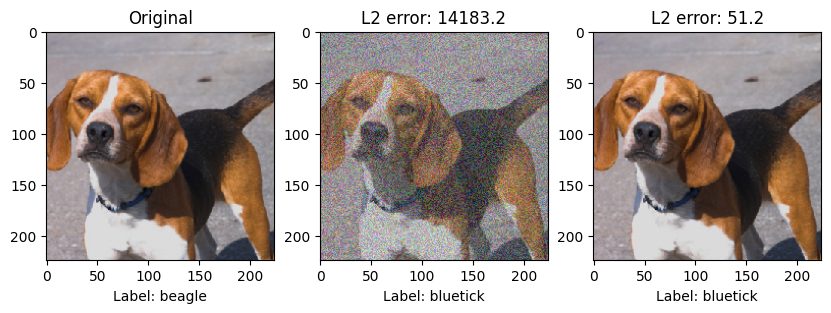

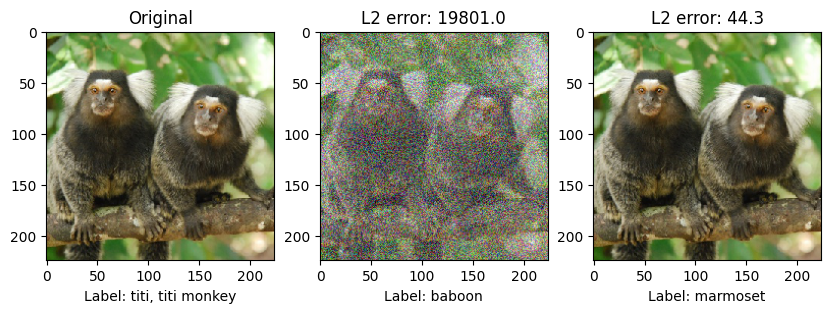

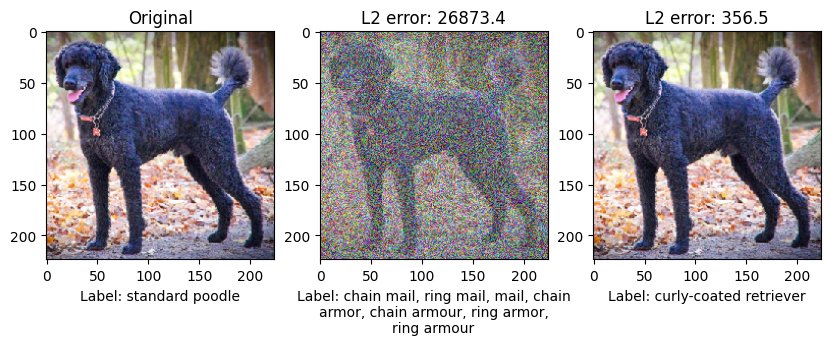

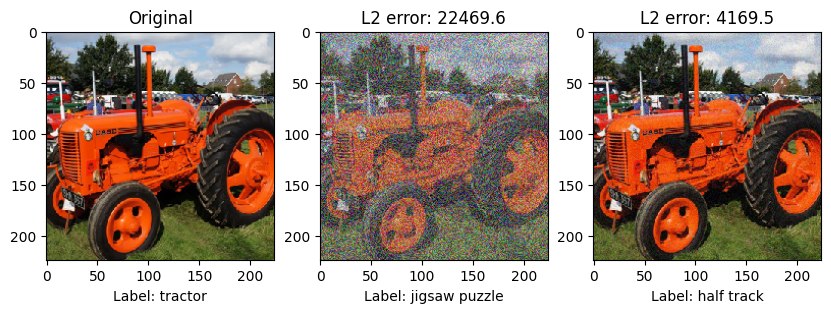

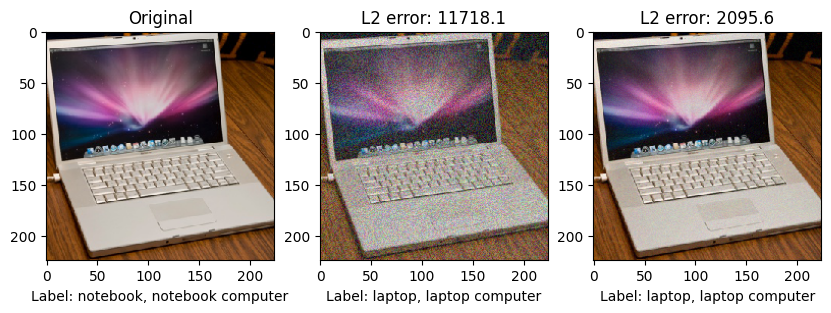

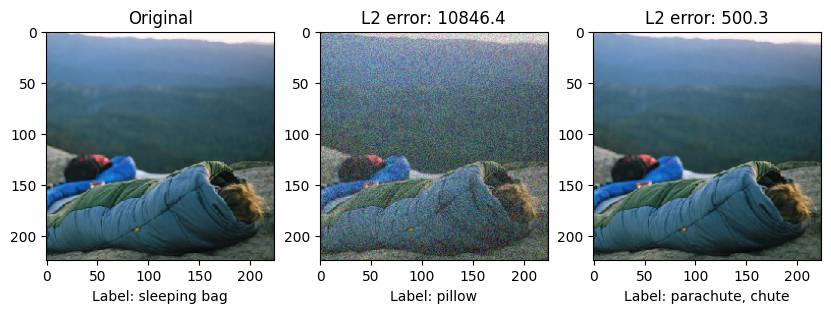

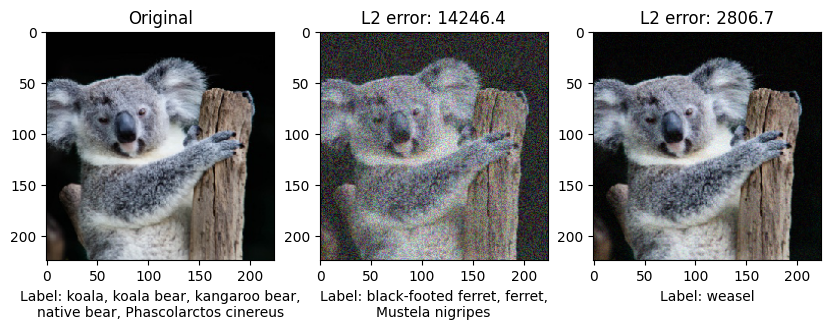

In [11]:
# save output images
for img in img_names:
    plt.figure(figsize=(10,15), dpi=100)
    plt = adv_plots(outputs, img)
    plt.ioff()
    plt.savefig('hsj_'+img+'.pdf', dpi=100, bbox_inches='tight')


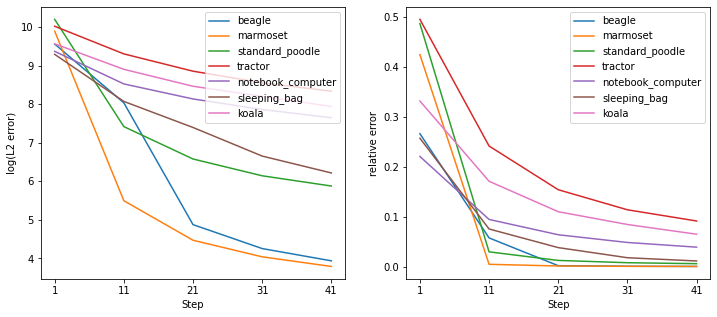

In [12]:
from math import log

plt.rcParams["figure.figsize"] = [12, 5]
steps = np.arange(1, 51, step=10)

plt.subplot(1, 2, 1)
for nm in img_names:
    plt.plot(
        steps, [log(a) for a in outputs[nm]["absolute_distance"]], label=nm
    )
plt.xticks(steps)
plt.xlabel("Step")
plt.ylabel("log(L2 error)")
plt.legend(loc="upper right")

plt.subplot(1, 2, 2)
for nm in img_names:
    plt.plot(steps, outputs[nm]["relative_distance"], label=nm)
plt.xticks(steps)
plt.xlabel("Step")
plt.ylabel("relative error")
plt.legend(loc="upper right")

# plt.show()
plt.savefig("hsj_plot.pdf", dpi=100, bbox_inches="tight")
